<a href="https://colab.research.google.com/github/istiaqahmedfahim/cloud_workload_forecasting/blob/main/Final%20Workload_forecasting_of_cloud_%7C_Attention_based_Hybrid%20network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pylab
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
import tensorflow as tf
rcParams['figure.figsize'] = 20, 16

In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, Flatten
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
#from keras.callbacks import EarlyStopping
from keras.layers import ConvLSTM2D

In [4]:
df = pd.read_csv('/content/43.csv')
df

,Timestamp [ms],CPU cores,CPU capacity provisioned [MHZ],CPU usage [MHZ],CPU usage [%],Memory capacity provisioned [KB],Memory usage [KB],Disk read throughput [KB/s],Disk write throughput [KB/s],Network received throughput [KB/s],Network transmitted throughput [KB/s]
0,1376314846,2,5851.998636,3.901332,0.066667,2097152.0,106254.133333,7.933333,1.066667,0.000000,0.000000
1,1376315146,2,5851.998636,0.000000,0.000000,2097152.0,79689.600000,0.000000,1.000000,0.000000,0.000000
2,1376315446,2,5851.998636,9.753331,0.166667,2097152.0,62912.000000,0.000000,0.066667,0.000000,0.000000
3,1376315746,2,5851.998636,0.000000,0.000000,2097152.0,97865.333333,0.000000,0.066667,0.000000,0.000000
4,1376316046,2,5851.998636,0.000000,0.000000,2097152.0,127225.333333,1.933333,0.333333,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
8627,1378905598,2,5851.998944,76.075986,1.300000,2097152.0,329950.133333,0.333333,561.866667,581.800000,18.400000
8628,1378905898,2,5851.998944,54.618657,0.933333,2097152.0,244665.333333,1.800000,1.133333,2.466667,1.066667
8629,1378906198,2,5851.998944,58.519989,1.000000,2097152.0,139808.800000,0.200000,0.866667,2.400000,1.066667
8630,1378906498,2,5851.998944,325.761275,5.566667,2097152.0,325755.733333,1029.666667,55.466667,2.466667,1.533333


In [5]:
Sum_disk=(df["Disk read throughput [KB/s]"] + df["Disk write throughput [KB/s]"])
df["Disk I/O"]=Sum_disk
df["Disk I/O"]=((df["Disk I/O"]-df["Disk I/O"].min())/(df["Disk I/O"].max()-df["Disk I/O"].min()))*20
df

,Timestamp [ms],CPU cores,CPU capacity provisioned [MHZ],CPU usage [MHZ],CPU usage [%],Memory capacity provisioned [KB],Memory usage [KB],Disk read throughput [KB/s],Disk write throughput [KB/s],Network received throughput [KB/s],Network transmitted throughput [KB/s],Disk I/O
0,1376314846,2,5851.998636,3.901332,0.066667,2097152.0,106254.133333,7.933333,1.066667,0.000000,0.000000,0.022571
1,1376315146,2,5851.998636,0.000000,0.000000,2097152.0,79689.600000,0.000000,1.000000,0.000000,0.000000,0.002508
2,1376315446,2,5851.998636,9.753331,0.166667,2097152.0,62912.000000,0.000000,0.066667,0.000000,0.000000,0.000167
3,1376315746,2,5851.998636,0.000000,0.000000,2097152.0,97865.333333,0.000000,0.066667,0.000000,0.000000,0.000167
4,1376316046,2,5851.998636,0.000000,0.000000,2097152.0,127225.333333,1.933333,0.333333,0.000000,0.000000,0.005684
...,...,...,...,...,...,...,...,...,...,...,...,...
8627,1378905598,2,5851.998944,76.075986,1.300000,2097152.0,329950.133333,0.333333,561.866667,581.800000,18.400000,1.409906
8628,1378905898,2,5851.998944,54.618657,0.933333,2097152.0,244665.333333,1.800000,1.133333,2.466667,1.066667,0.007356
8629,1378906198,2,5851.998944,58.519989,1.000000,2097152.0,139808.800000,0.200000,0.866667,2.400000,1.066667,0.002675
8630,1378906498,2,5851.998944,325.761275,5.566667,2097152.0,325755.733333,1029.666667,55.466667,2.466667,1.533333,2.721338


# choosing the target feature

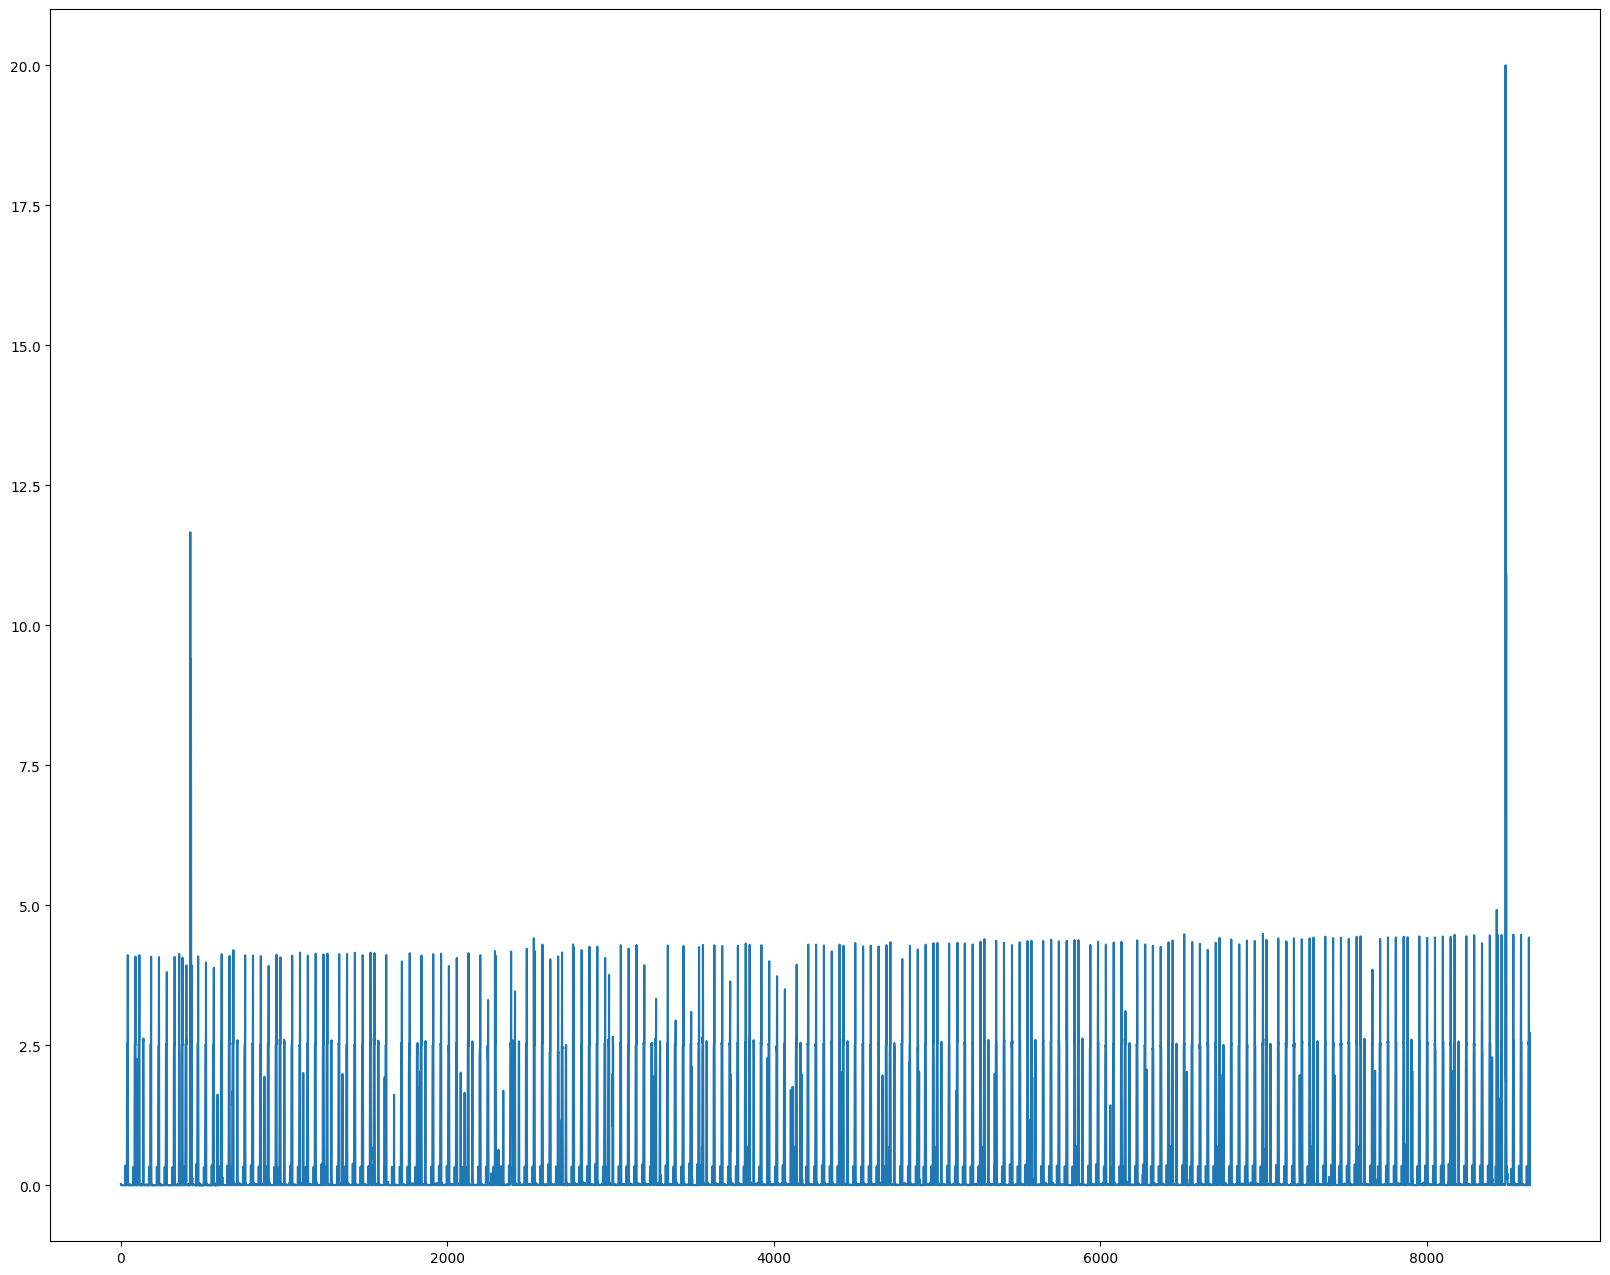

In [6]:
df1 = df['Disk I/O']
df1=df1.to_frame()
plt.plot(df1)
dataset = df1.values
dataset = dataset.astype('float32') #COnvert values to float

# data normalization

In [7]:
scaler = MinMaxScaler(feature_range=(0, 1)) #Also try QuantileTransformer
dataset = scaler.fit_transform(dataset)

In [8]:
desired_value = 0.0

# Find all indices where the desired value occurs in the specified column
indices_of_value = df[df['Disk I/O'] == desired_value].index

if not indices_of_value.empty:
    print(f"The value '{desired_value}' was found in the column '' at indices: {indices_of_value.tolist()}")
else:
    print(f"The value '{desired_value}' was not found in the column ''")
print(len(indices_of_value.tolist()))

The value '0.0' was found in the column '' at indices: [5, 9, 10, 11, 13, 17, 23, 24, 27, 33, 34, 46, 47, 53, 55, 61, 63, 65, 67, 69, 70, 73, 79, 81, 82, 93, 94, 95, 97, 98, 103, 115, 116, 118, 119, 120, 127, 128, 131, 132, 142, 143, 144, 145, 146, 149, 151, 157, 158, 160, 163, 164, 166, 167, 168, 169, 170, 178, 188, 191, 192, 193, 197, 199, 202, 203, 204, 205, 206, 211, 212, 213, 215, 216, 217, 218, 223, 224, 226, 227, 236, 239, 243, 245, 250, 252, 255, 256, 260, 263, 264, 265, 266, 271, 273, 284, 285, 286, 287, 288, 291, 293, 300, 302, 303, 305, 308, 309, 311, 312, 313, 315, 319, 320, 322, 332, 334, 336, 337, 338, 339, 340, 343, 350, 360, 361, 362, 370, 380, 382, 384, 386, 391, 404, 405, 406, 408, 415, 417, 422, 440, 463, 467, 475, 479, 486, 491, 493, 495, 498, 499, 504, 505, 524, 529, 530, 533, 534, 539, 541, 542, 547, 551, 553, 554, 555, 559, 578, 579, 581, 583, 586, 587, 589, 590]
175


In [9]:
# Drop rows with null values based on indices
df.drop(indices_of_value, inplace=True)

# Alternatively, you can create a new DataFrame without modifying the original one:
# new_df = df.drop(null_indices)

# If you want to reset the index after dropping rows:
df.reset_index(drop=True, inplace=True)

# Verify that null values have been dropped
print("DataFrame after dropping rows with null values:")
print(df)

DataFrame after dropping rows with null values:
      Timestamp [ms]  CPU cores  CPU capacity provisioned [MHZ]  \
0         1376314846          2                     5851.998636   
1         1376315146          2                     5851.998636   
2         1376315446          2                     5851.998636   
3         1376315746          2                     5851.998636   
4         1376316046          2                     5851.998636   
...              ...        ...                             ...   
8452      1378905598          2                     5851.998944   
8453      1378905898          2                     5851.998944   
8454      1378906198          2                     5851.998944   
8455      1378906498          2                     5851.998944   
8456      1378906798          2                     5851.998944   

      CPU usage [MHZ]  CPU usage [%]  Memory capacity provisioned [KB]  \
0            3.901332       0.066667                         2097152.0   

In [10]:
desired_value = 0.0

# Find all indices where the desired value occurs in the specified column
indices_of_value = df[df['Disk I/O'] == desired_value].index

if not indices_of_value.empty:
    print(f"The value '{desired_value}' was found in the column '' at indices: {indices_of_value.tolist()}")
else:
    print(f"The value '{desired_value}' was not found in the column ''")
print(len(indices_of_value.tolist()))

The value '0.0' was not found in the column ''
0


# Train test split

In [11]:
train_size = int(len(dataset) * 0.65)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# define window function

In [12]:
def to_sequences(dataset, seq_size=1):
    x = []
    y = []

    for i in range(len(dataset)-seq_size-1):
        #print(i)
        window = dataset[i:(i+seq_size), 0]
        x.append(window)
        y.append(dataset[i+seq_size, 0])

    return np.array(x),np.array(y)

# Windowing the data|Preprocess before model input

In [13]:
seq_size = 30  # Number of time steps to look back
#Larger sequences (look further back) may improve forecasting.

trainX, trainY = to_sequences(train, seq_size)
testX, testY = to_sequences(test, seq_size)

In [14]:
print("Shape of training set: {}".format(trainX.shape))
print("Shape of test set: {}".format(testX.shape))

Shape of training set: (5579, 30)
Shape of test set: (2991, 30)


In [15]:
# Reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# Define the model

In [16]:
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import Bidirectional, LSTM, Dense

In [17]:
import tensorflow as tf
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import Bidirectional, LSTM, Dense
from tensorflow.keras.layers import Layer, Attention

class AttentionLayer(Layer):
    def __init__(self, **kwargs):
        super(AttentionLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        self.W_q = self.add_weight(name="W_q", shape=(input_shape[-1], input_shape[-1]), initializer="uniform", trainable=True)
        self.W_k = self.add_weight(name="W_k", shape=(input_shape[-1], input_shape[-1]), initializer="uniform", trainable=True)
        self.V = self.add_weight(name="V", shape=(input_shape[-1], 1), initializer="uniform", trainable=True)
        super(AttentionLayer, self).build(input_shape)

    def call(self, x):
        q = tf.matmul(x, self.W_q)
        k = tf.matmul(x, self.W_k)
        scores = tf.matmul(tf.nn.tanh(q + k), self.V)
        attention_weights = tf.nn.softmax(scores, axis=-2)
        context_vector = attention_weights * x
        return context_vector

    def compute_output_shape(self, input_shape):
        return input_shape

 # My best model
def create_model(seq_size):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv1D(filters=64, kernel_size=5, strides=1, padding="causal", activation="relu", input_shape=[None, seq_size]),
        tf.keras.layers.LSTM(64, activation="relu", return_sequences=True),
        tf.keras.layers.LSTM(64, activation="relu", return_sequences=True),
        AttentionLayer(),  # Add Attention Layer
        tf.keras.layers.Bidirectional(LSTM(50, activation="relu",return_sequences=True)),
        tf.keras.layers.GRU(64,activation="relu"),# Return sequences here
        tf.keras.layers.Dense(1, 'linear')
    ])
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])
    return model


Define the Model checkpoint callback

In [19]:
from tensorflow.keras.callbacks import ModelCheckpoint
# Define the ModelCheckpoint callback
checkpoint_path = "best_model.h5"
checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Model Fitting

In [21]:
#call the model creation function
model1= create_model(seq_size)
history = model1.fit(trainX, trainY, validation_data=(testX, testY),batch_size=64,
      verbose=2, epochs=300,callbacks=[checkpoint])

Epoch 1/300

Epoch 1: val_mse improved from inf to 0.00288, saving model to best_model.h5
88/88 - 12s - loss: 0.0025 - mae: 0.0339 - mse: 0.0025 - val_loss: 0.0029 - val_mae: 0.0307 - val_mse: 0.0029 - 12s/epoch - 141ms/step
Epoch 2/300

Epoch 2: val_mse improved from 0.00288 to 0.00097, saving model to best_model.h5
88/88 - 1s - loss: 0.0012 - mae: 0.0190 - mse: 0.0012 - val_loss: 9.7458e-04 - val_mae: 0.0123 - val_mse: 9.7458e-04 - 1s/epoch - 15ms/step
Epoch 3/300

Epoch 3: val_mse improved from 0.00097 to 0.00087, saving model to best_model.h5
88/88 - 2s - loss: 7.1116e-04 - mae: 0.0122 - mse: 7.1116e-04 - val_loss: 8.7268e-04 - val_mae: 0.0115 - val_mse: 8.7268e-04 - 2s/epoch - 23ms/step
Epoch 4/300

Epoch 4: val_mse did not improve from 0.00087
88/88 - 1s - loss: 6.6874e-04 - mae: 0.0118 - mse: 6.6874e-04 - val_loss: 8.9987e-04 - val_mae: 0.0096 - val_mse: 8.9987e-04 - 1s/epoch - 16ms/step
Epoch 5/300

Epoch 5: val_mse did not improve from 0.00087
88/88 - 1s - loss: 6.1607e-04 - m

Load the best model

In [22]:
# Load the best model
# Load the best model using keras.utils.custom_object_scope
from tensorflow.keras.models import load_model
custom_objects = {"AttentionLayer": AttentionLayer}
with tf.keras.utils.custom_object_scope(custom_objects):
    best_model = load_model(checkpoint_path,compile=False)

Prediction using learned model

In [23]:
train_mae = history.history["mae"]
val_mae = history.history["val_mae"]

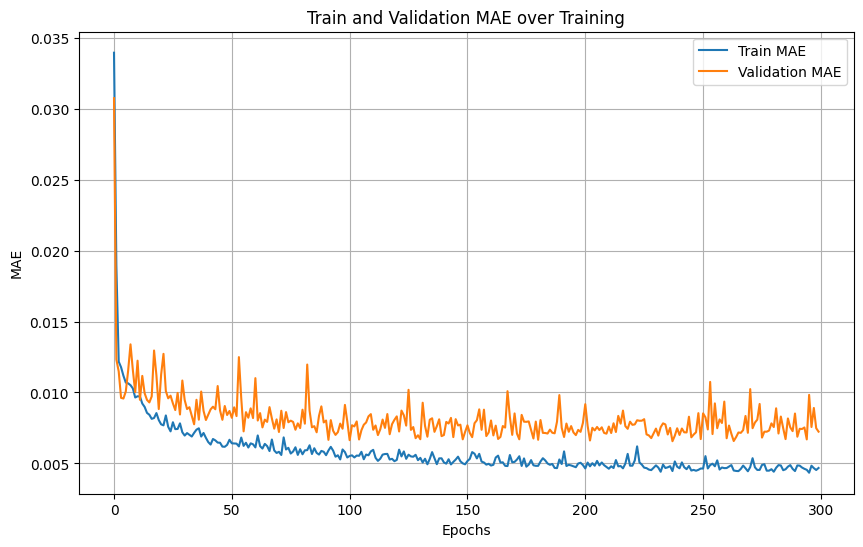

In [24]:
# Figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plot train and validation MAE over epochs
ax.plot(range(len(train_mae)), train_mae, label="Train MAE")
ax.plot(range(len(val_mae)), val_mae, label="Validation MAE")

# Customize labels and title
ax.set_xlabel("Epochs")
ax.set_ylabel("MAE")
ax.set_title("Train and Validation MAE over Training")

# Add legend and grid
ax.legend()
ax.grid(True)

# Show the plot
plt.show()

In [25]:
train_loss = history.history["loss"]
val_loss = history.history["val_loss"]

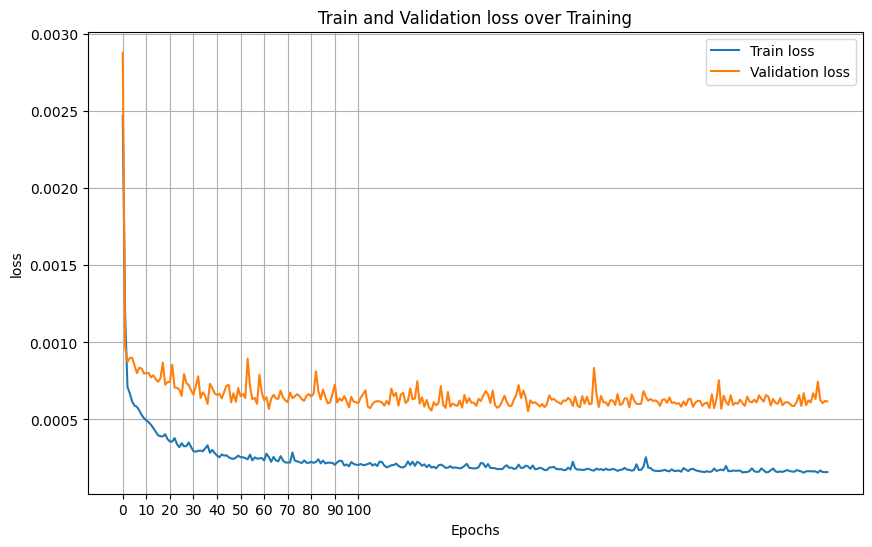

In [26]:
# Figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plot train and validation MAE over epochs
ax.plot(range(len(train_loss)), train_loss, label="Train loss")
ax.plot(range(len(val_loss)), val_loss, label="Validation loss")

# Customize labels and title
ax.set_xlabel("Epochs")
ax.set_ylabel("loss")
ax.set_title("Train and Validation loss over Training")
plt.xticks(range(0, 101, 10))
# Add legend and grid
ax.legend()
ax.grid(True)

# Show the plot
plt.show()

In [27]:
min_val_MAE = min(history.history['val_mae'])
min_mae_epoch = np.argmin(history.history['val_mae'])
print(f"Minimum Validation MAE {min_val_MAE}")
print(f"Minimum Validation MAE at epoch {min_mae_epoch}")
min_val_loss = min(history.history['loss'])
min_loss_epoch = np.argmin(history.history['val_loss'])
print(f"Minimum Validation loss {min_val_loss}")
print(f"Minimum Validation loss at epoch {min_loss_epoch}")

Minimum Validation MAE 0.006566410884261131
Minimum Validation MAE at epoch 237
Minimum Validation loss 0.00015436485409736633
Minimum Validation loss at epoch 172


In [28]:
trainPredict = best_model.predict(trainX)
testPredict = best_model.predict(testX)

94/94 [==============================] - 0s 4ms/step


From Normalized data to Actual data transformation

In [29]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

RMSE Calculation

In [30]:
import math
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))

Train Score: 0.27 RMSE


In [31]:
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Test Score: 0.47 RMSE


In [32]:
# calculate root mean absoulute error
from sklearn.metrics import mean_absolute_error
# Calculate MAE using scikit-learn
mae = mean_absolute_error(trainY[0],trainPredict[:,0])

print(f"Mean Absolute Error: {mae}")

# Calculate MAE using scikit-learn
mae = mean_absolute_error(testY[0],testPredict[:,0])

print(f"Mean Absolute Error on test data: {mae}")



Mean Absolute Error: 0.09583084262771456
Mean Absolute Error on test data: 0.13401928357827628


In [33]:
from sklearn.metrics import mean_squared_error
# Calculate MSE
mse = mean_squared_error(trainY[0],trainPredict[:,0])
print(f"Mean Squared Error (MSE) of train: {mse}")
mse = mean_squared_error(testY[0],testPredict[:,0])
print(f"Mean Squared Error (MSE) of test: {mse}")

Mean Squared Error (MSE) of train: 0.07335861769159874
Mean Squared Error (MSE) of test: 0.22125338370883582


In [34]:
# shift train predictions for plotting
#we must shift the predictions so that they align on the x-axis with the original dataset.
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[seq_size:len(trainPredict)+seq_size, :] = trainPredict

In [35]:
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(seq_size*2)+1:len(dataset)-1, :] = testPredict

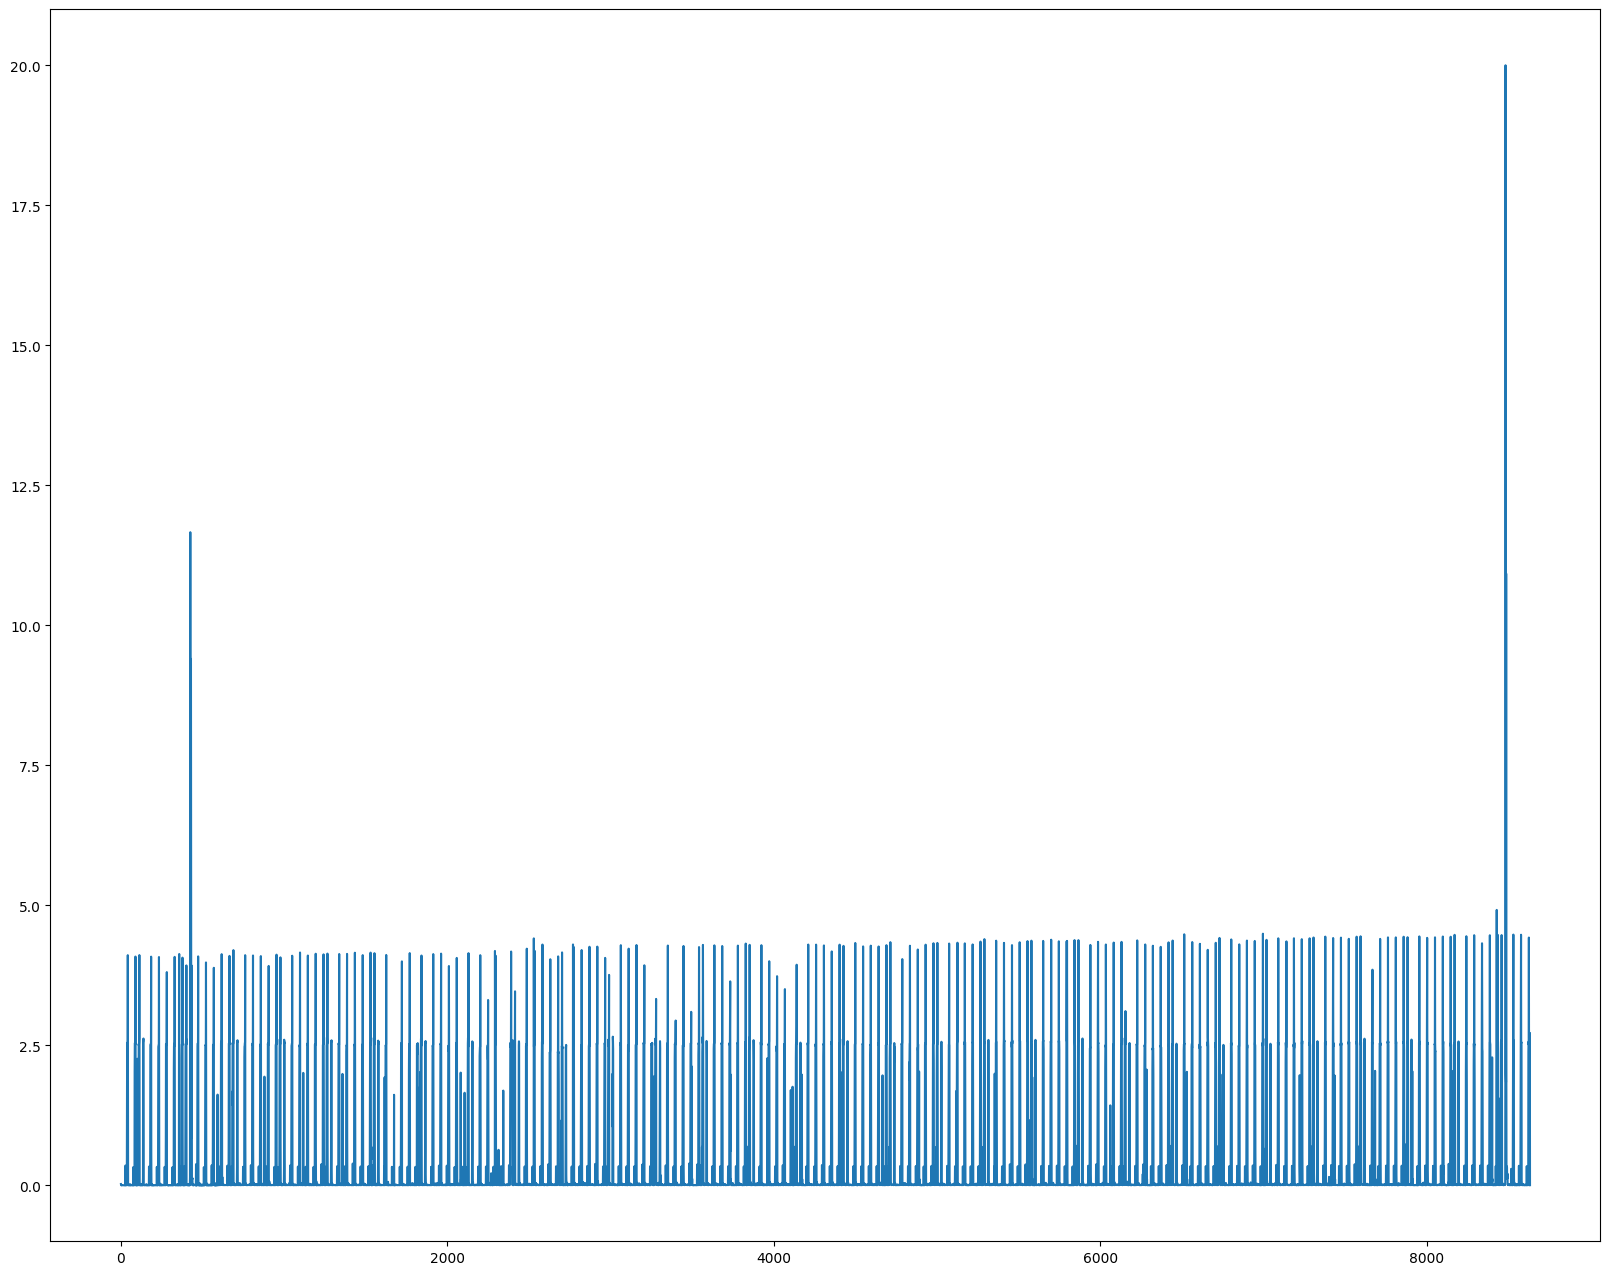

In [36]:
plt.figure()
plt.plot(scaler.inverse_transform(dataset))
plt.show()

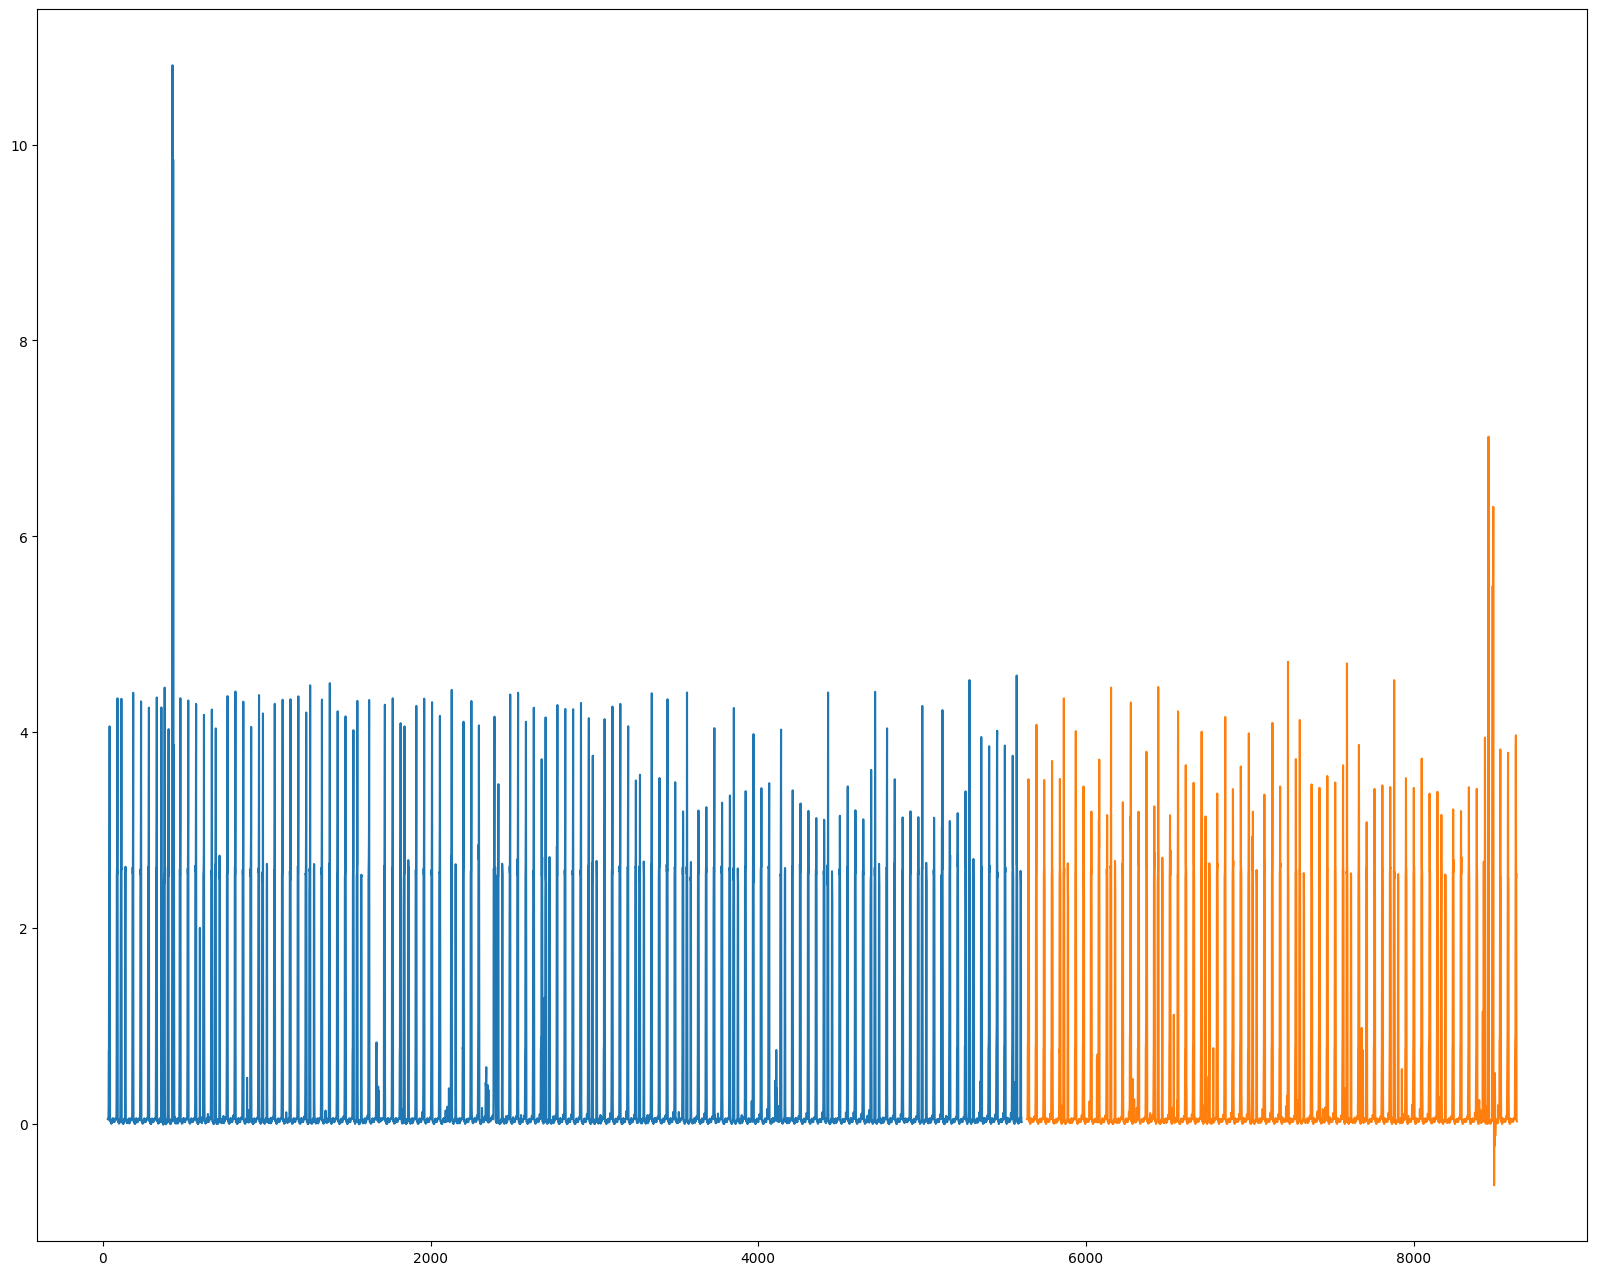

In [37]:
plt.figure()
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

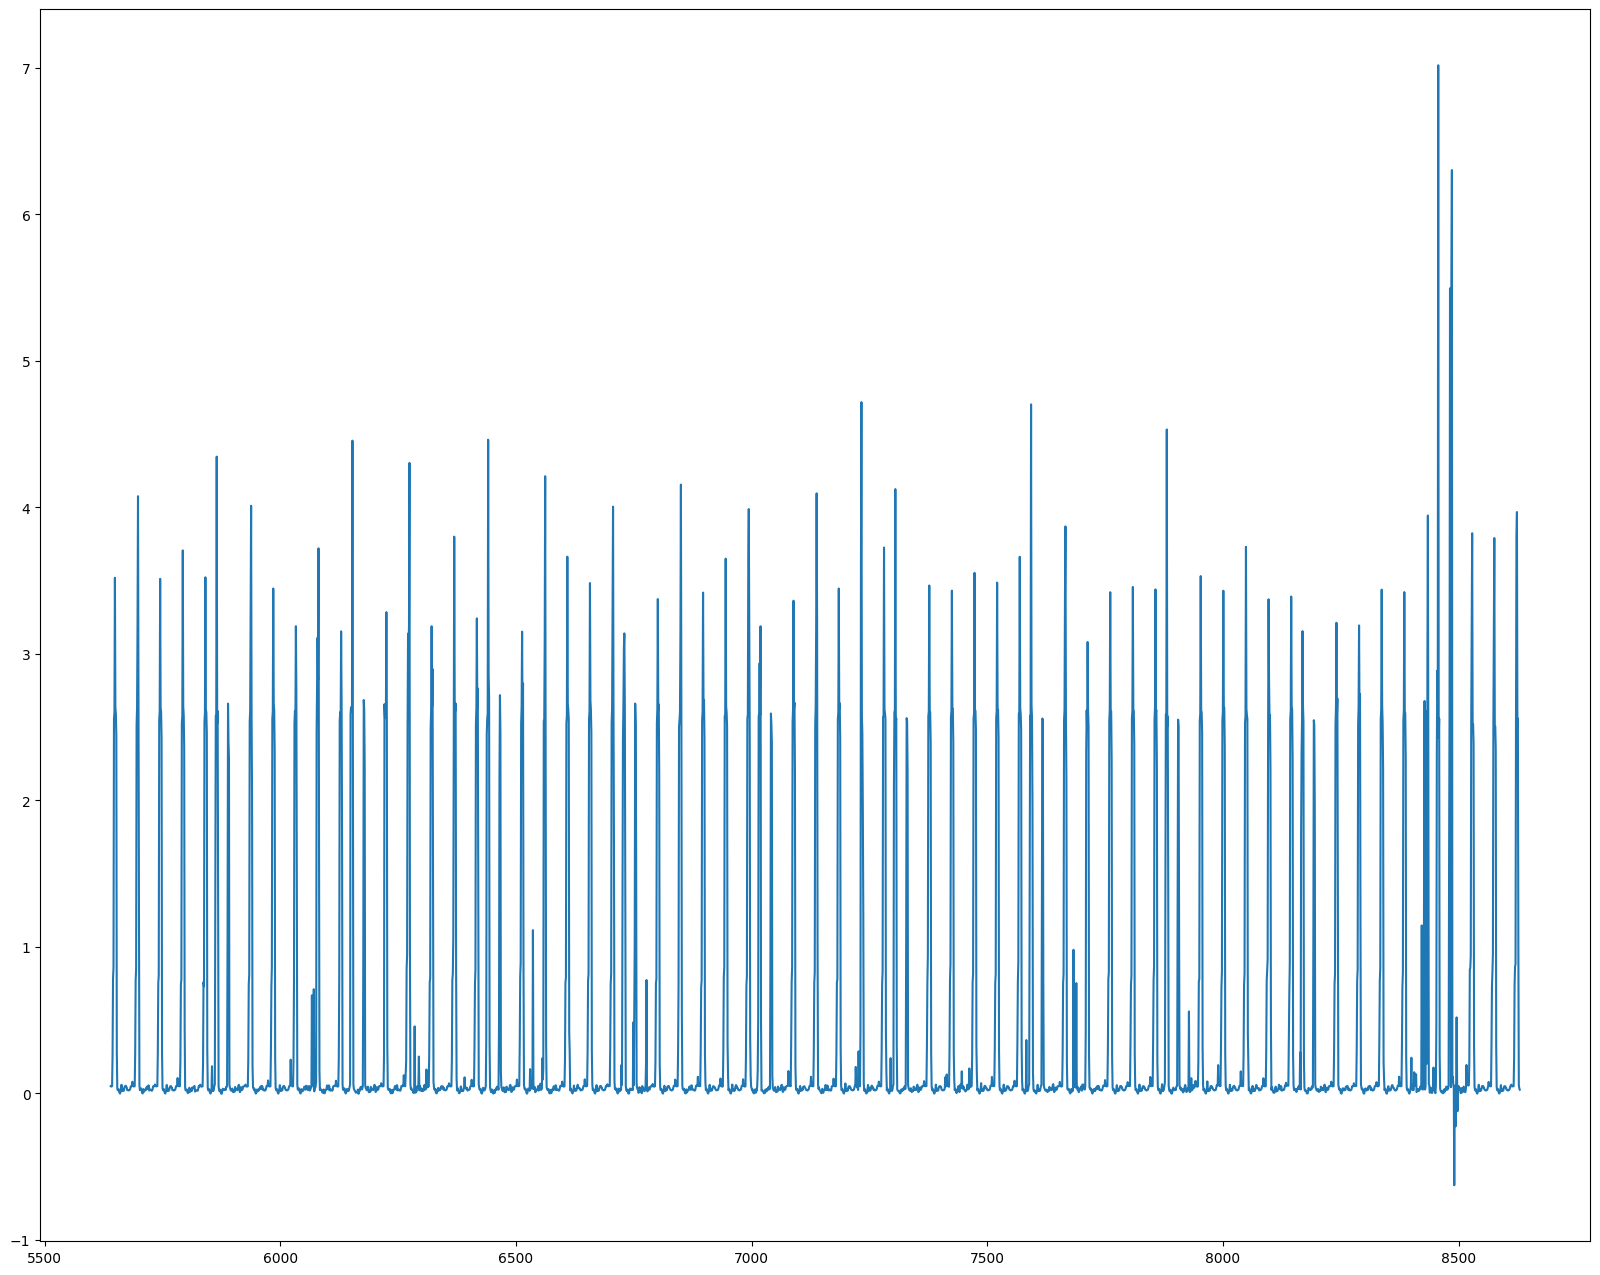

In [38]:
plt.figure()
plt.plot(testPredictPlot)
plt.show()

Adding Index column

In [39]:
df.reset_index(inplace=True)

In [40]:
df

,index,Timestamp [ms],CPU cores,CPU capacity provisioned [MHZ],CPU usage [MHZ],CPU usage [%],Memory capacity provisioned [KB],Memory usage [KB],Disk read throughput [KB/s],Disk write throughput [KB/s],Network received throughput [KB/s],Network transmitted throughput [KB/s],Disk I/O
0,0,1376314846,2,5851.998636,3.901332,0.066667,2097152.0,106254.133333,7.933333,1.066667,0.000000,0.000000,0.022571
1,1,1376315146,2,5851.998636,0.000000,0.000000,2097152.0,79689.600000,0.000000,1.000000,0.000000,0.000000,0.002508
2,2,1376315446,2,5851.998636,9.753331,0.166667,2097152.0,62912.000000,0.000000,0.066667,0.000000,0.000000,0.000167
3,3,1376315746,2,5851.998636,0.000000,0.000000,2097152.0,97865.333333,0.000000,0.066667,0.000000,0.000000,0.000167
4,4,1376316046,2,5851.998636,0.000000,0.000000,2097152.0,127225.333333,1.933333,0.333333,0.000000,0.000000,0.005684
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8452,8452,1378905598,2,5851.998944,76.075986,1.300000,2097152.0,329950.133333,0.333333,561.866667,581.800000,18.400000,1.409906
8453,8453,1378905898,2,5851.998944,54.618657,0.933333,2097152.0,244665.333333,1.800000,1.133333,2.466667,1.066667,0.007356
8454,8454,1378906198,2,5851.998944,58.519989,1.000000,2097152.0,139808.800000,0.200000,0.866667,2.400000,1.066667,0.002675
8455,8455,1378906498,2,5851.998944,325.761275,5.566667,2097152.0,325755.733333,1029.666667,55.466667,2.466667,1.533333,2.721338


In [41]:
time_list = df['index'].tolist()

In [42]:
time_array = np.array(time_list)

# PLotting the data

In [43]:
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time", fontsize=15)
    plt.ylabel("Disk Usages", fontsize=15)
    plt.grid(True)

In [44]:
train=scaler.inverse_transform(train)

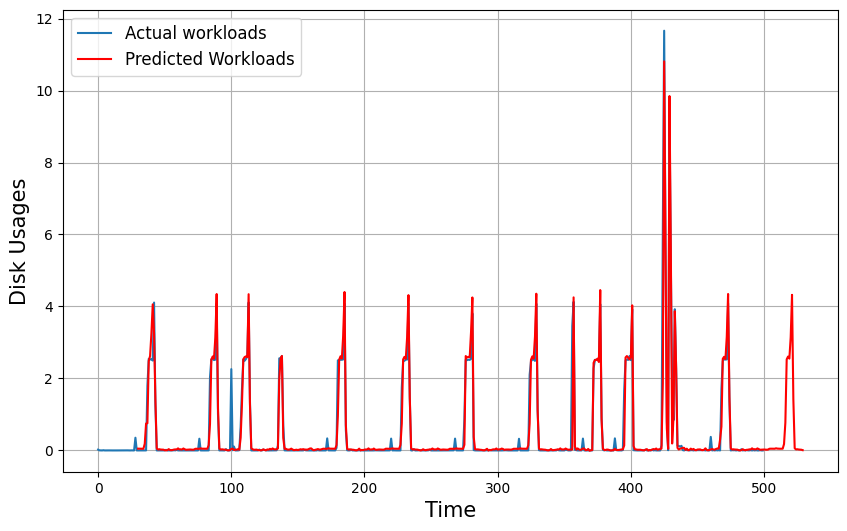

In [45]:
plt.figure(figsize=(10, 6))
plot_series(time_array[0:500],train[:500,0])
plot_series(time_array[30:530],trainPredict[:500,0],'r' )
plt.legend(('Actual workloads', 'Predicted Workloads'),fontsize=12)
plt.savefig('3 day disk pred.png', dpi = 1080)

We have shown 104 hours 4 munits of data distribution from train dataset where prediction curves catches all the trends. we have also forcasted future disk usage of 1 hour 4 min.

In [46]:
test = scaler.inverse_transform(test)

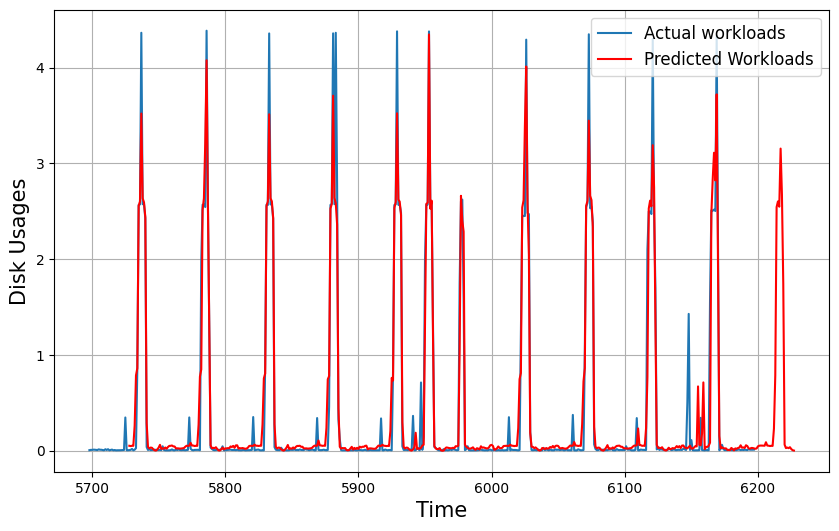

In [47]:
plt.figure(figsize=(10, 6))
plot_series(time_array[5698:6198],test[:500,0])
plot_series(time_array[5698+30:6198+30],testPredict[:500,0],'r' )
plt.legend(('Actual workloads', 'Predicted Workloads'),fontsize=12)
plt.savefig('3 day disk pred.png', dpi = 1080)

We have shown 104 hours 4 munits of data distribution from test dataset where prediction curves catches all the trends. we have also forcasted future disk usage of 1 hour 4 min.